# Implementation of models of neurons

## First model of a neuron - (1)

- Hodgkin-Huxley model
- describing a pyramidal cell
- single-compartment

WARNING    The NeuronGroup 'neuron' sets a threshold but neither a reset condition nor a refractory condition has been set. Did you forget either of those? If this was intended, set the reset argument to an empty string in order to avoid this warning. [brian2.groups.neurongroup.only_threshold]
WARNING    Cannot use Cython, a test compilation failed: Cython is not available (ImportError)
Certain compiler configurations (e.g. clang in a conda environment on OS X) are known to be problematic. Note that you can switch the compiler by setting the 'CC' and 'CXX' environment variables. For example, you may want to try 'CC=gcc' and 'CXX=g++'. [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


Starting simulation at t=0. s for a duration of 0.5 s
179.48 ms (35%) simulated in 10s, estimated 18s remaining.
0.354 s (70%) simulated in 20s, estimated 8s remaining.
0.5 s (100%) simulated in 28s


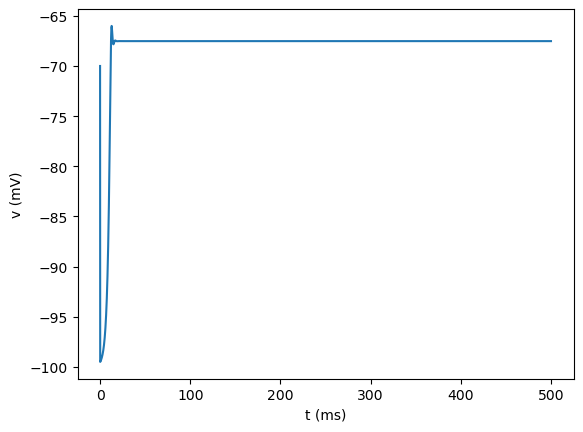

In [1]:
from brian2 import *

defaultclock.dt = 0.01*ms

codegen.target='cython'

start_scope()

Texp = 37; C = 1*uF/cm**2 
El = -87*mV; ENa = 71*mV; EK = -100*mV
gl = 33.8*usiemens/cm**2; gK = 6930000*usiemens/cm**2; gNa = 2040000*usiemens/cm**2
Um = -38*mV; Wm = 6*mV; Uh = -66*mV; Wh = 6*mV
Un = 18.7*mV; Wn = 9.7*mV
Q10 = 2.3

eqs = '''
Iin : ampere/metre**2
minf = alpham/(alpham+betam) : 1
hinf = alphah/(alphah+betah) : 1
ninf = 1/(1 + exp((Un - v)/Wn)) : 1
Taum = 1/(Tau*(alpham + betam)) : second
Tauh = 1/(Tau*(alphah + betah)) : second
Taun = 0.004*second/((Tau * (1/exp(-(v+56.56*mV)/(44.14*mV))))) : second
Tau = Q10**((Texp-21)/10) : 1
alpham = (182/mvolt/second*(v - Um))/(1 - exp((Um-v)/Wm)) : Hz
betam = (124/mvolt/second*(Um-v))/(1 - exp((v-Um)/Wm)) : Hz
alphah = (15/mvolt/second*(Uh - v))/(1 - exp((v - Um)/Wh)) : Hz
betah = (15/mvolt/second*(v - Uh))/(1 - exp((Uh - v)/Wh)) : Hz
dv/dt =  (Iin -gl*(v - El) - gNa*m**3*h*(v - ENa) - gK*n*(v - EK)) / C : volt
dm/dt = (minf-m)/Taum : 1
dh/dt = (hinf-h)/Tauh : 1
dn/dt = (ninf-n)/Taun : 1
'''

neurons = NeuronGroup(1, eqs, threshold='v > 50*mV', method='exponential_euler',name='neuron*',dt=0.02*ms)
neurons.v = -70*mV
neurons.m = 0.01 
neurons.h = 0.99
neurons.n = 0.01
neurons.Iin = 10**4.5*nA/cm**2

NeuMonitor = StateMonitor(neurons, variables = ["v", "m", "h", "n"],record=True,name='neumon*')
run(0.5 * second, report='text')

plot(NeuMonitor.t/ms, NeuMonitor.v[:].T/mV)
# plot(NeuMonitor.t/ms, NeuMonitor[10].v/mV)
# plot(NeuMonitor.t/ms, NeuMonitor[99].v/mV)
xlabel('t (ms)')
ylabel('v (mV)')
show()


#neurons.Q10 = 37*kelvin
# S = SpikeMonitor(neurons)

# store() 

# We locate the threshold by bisection
# v0 = 25*mV*ones(len(neurons))
# step = 25*mV

# for i in range(10): 
#     restore()
#     neurons.v = v0 
#     run(20*ms)
#     v0[S.count == 0] += step 
#     v0[S.count >0]-=step 
#     step /= 2.0

## Neuronal Model Code (structured) - (2)

- Hodgkin-Huxley model
- describing a pyramidal cell
- single-compartment

WARNING    The NeuronGroup 'HH' sets a threshold but neither a reset condition nor a refractory condition has been set. Did you forget either of those? If this was intended, set the reset argument to an empty string in order to avoid this warning. [brian2.groups.neurongroup.only_threshold]


{'N0_i': 10. * mmolar, 'N0_e': 145. * mmolar, 'K0_i': 130. * mmolar, 'K0_e': 3. * mmolar, 'C0_i': 5. * mmolar, 'C0_e': 130. * mmolar, 'c_m': 0.01 * metre ** -4 * kilogram ** -1 * second ** 4 * amp ** 2, 'g_Na': 20400. * metre ** -4 * kilogram ** -1 * second ** 3 * amp ** 2, 'g_K': 6380. * metre ** -4 * kilogram ** -1 * second ** 3 * amp ** 2, 'g_Cl': 3.38 * metre ** -4 * kilogram ** -1 * second ** 3 * amp ** 2, 'v_thr': 0. * volt, 'U_m': -38. * mvolt, 'U_h': -66. * mvolt, 'U_n': 18.7 * mvolt, 'W_m': 6. * mvolt, 'W_h': 6. * mvolt, 'W_n': 9.7 * mvolt, 'T_exp': 37, 'I_dc': 0.31622777 * amp / (meter ** 2), 'I_ramp': 0. * amp / (meter ** 2), 'I_max': 0.42 * amp / (meter ** 2), 'T_ramp': 100. * second, 'TimedArray': <brian2.input.timedarray.TimedArray object at 0x14d297bb0>, 't_step': 50. * msecond, 't_end': 100. * msecond, 'T_adj': 3.7910938669360985, 'E_Na': 71.47105937 * mvolt, 'E_K': -100.73069784 * mvolt, 'E_Cl': -87.07803553 * mvolt, 'F': 96485.33212 * second * amp * mole ** -1}


WARNING    Group uses a dt of 100. ns while TimedArray uses dt of 100. ms (ratio: 1/1000000.0000000001) → time grids not aligned [brian2.input.timedarray]


Starting simulation at t=0 s for duration 0.2 s
0.118693 s (59%) simulated in 10s, estimated 7s remaining.
0.2 s (100%) simulated in 16s


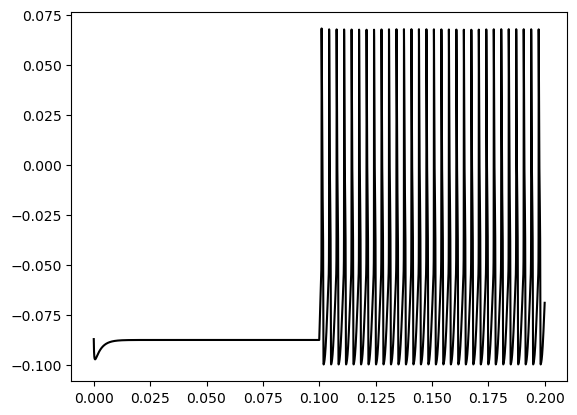

In [ ]:
device.reinit()
device.activate()

#-----------------------------------------------------------------------------------------------------------------------
# Default Imports
#-----------------------------------------------------------------------------------------------------------------------
import numpy as np
import scipy.constants as spc

#-----------------------------------------------------------------------------------------------------------------------
# Brian2 import: we use Brian CPP-standalone code generation for fast parallelized simulations
#-----------------------------------------------------------------------------------------------------------------------
from brian2 import *
code_dir = './codegen'
prefs.GSL.directory = '/opt/anaconda3/envs/Brian2_NGILab/include/'   ## The directory where the GSL library headings are found
set_device('cpp_standalone',directory=code_dir,build_on_run=False)
prefs.devices.cpp_standalone.openmp_threads = 8 ## The number of threads used in the parallelization (machine-dependent)
prefs.logging.file_log = False
prefs.logging.delete_log_on_exit = True

import matplotlib.pyplot as plt

#-----------------------------------------------------------------------------------------------------------------------
## Utilities
#-----------------------------------------------------------------------------------------------------------------------
def varargin(pars, **kwargs):
    """
    varargin-like option for user-defined parameters in any function/module
    Use:
    pars = varargin(pars,**kwargs)

    Input:
    - pars     : the dictionary of parameters of the calling function
    - **kwargs : a dictionary of user-defined parameters

    Output:
    - pars     : modified dictionary of parameters to be used inside the calling
                 (parent) function

    Maurizio De Pitta', The University of Chicago, August 27th, 2014.
    """
    for key, val in kwargs.items():
        if key in pars:
            pars[key] = val
    return pars

#-----------------------------------------------------------------------------------------------------------------------
## Build User-defined convenience functions to be also called by equations in neuron models by Brian
#-----------------------------------------------------------------------------------------------------------------------
def Hill(x,K,n):
    return x**n/(x**n+K**n)
Hill = Function(Hill,arg_units=[mmolar,mmolar,1], return_unit=1,auto_vectorise=False)
Hill_cpp = '''
    #include <math.h>
    double Hill(double x,double K,double n)
    {
        return pow(x,n)/(pow(x,n)+pow(K,n));
    };
    '''
Hill.implementations.add_implementation('cpp',Hill_cpp,compiler_kwds={'headers': ['"math.h"']})

def ThermalVoltage(T):
    return spc.R*(T+273.15)/spc.physical_constants['Faraday constant'][0]
ThermalPotential = Function(ThermalVoltage,arg_units=[1], return_unit=1,auto_vectorise=False)
ThermalVoltage_cpp = '''
    #include <gsl/gsl_const_mksa.h>
    double ThermalPotential(const double T)
    {
        const double R = GSL_CONST_MKSA_MOLAR_GAS;
        const double F = GSL_CONST_MKSA_FARADAY;
        return R*(T+273.15)/F;
    }
    '''
ThermalPotential.implementations.add_implementation('cpp',ThermalVoltage_cpp,
                                                  compiler_kwds={'headers': ['"gsl_const_mksa.h"'],
                                                                 'include_dirs': ['/opt/anaconda3/envs/Brian2_NGILab/include/']})
def NernstPotential(x_e,x_i,z,T):
    """
    Nernst potential in volts (w/out units)

    Input parameters (w/out units):
    - x_e : float   Intracellular concentration
    - x_i : float   Extracellyular concentration
    - z   : int     Ion valence
    - T   : float   Temperature in ^C

    Return:
    - E_x : Nernst Reverse Potential in volt (W/OUT units)
    """
    V_T = ThermalVoltage(T)
    return V_T/z*np.log(x_e/x_i)
NernstPotential = Function(NernstPotential,arg_units=[mmolar,mmolar,1,1], return_unit=1,auto_vectorise=False)
NernstPotential_cpp = '''
    #include <gsl/gsl_const_mksa.h>
    const double R = GSL_CONST_MKSA_MOLAR_GAS; 
    const double F = GSL_CONST_MKSA_FARADAY;
    double ThermalVoltage(const double T)
    {
        return R*(T+273.15)/F;
    };
    double NernstPotential(double x_e,double x_i,double z,const double T)
    {
        return ThermalVoltage(T)*log(x_e/x_i)/z;
    };
    '''
NernstPotential.implementations.add_implementation('cpp',NernstPotential_cpp,
                                                   dependencies={'log': DEFAULT_FUNCTIONS['log']},
                                                   compiler_kwds={'headers': ['"gsl_const_mksa.h"'],
                                                                  'include_dirs': ['/opt/anaconda3/envs/Brian2_NGILab/include/']})


def Heaviside_Function(t_step, t_end, t):
    if (t < t_step):
        return 0
    elif (t_step <= t <= t_end):
        return 1
    else:
        return 0
Heaviside_Function = Function(Heaviside_Function,arg_units=[second,second,second], return_unit=1,auto_vectorise=False)
Heaviside_Function_cpp = '''
    double Heaviside_Function(double t_step, double t_end, double t)
    {
    if (t < t_step)
        return 0;
    else if (t <= t_end)
        return 1;
    else
        return 0;
    };
    '''
Heaviside_Function.implementations.add_implementation('cpp',Heaviside_Function_cpp,
                                                   dependencies={'log': DEFAULT_FUNCTIONS['log']},
                                                    )

def lpc5_parameters(model='hh-neuron',**kwargs):
    """
    Method to generate neuron parameters' dictionary.

    Input parameters:
    - model  : {'hh-neuron'} (or 'hh') | 'hh-ecs'   Model equations
    **kwargs : list of custom parameters specified by <parameter name>=<value in units>

    Return:
    - pars   : dict
    """

    ta = TimedArray([0, 1] * 1, dt=0.1*second)

    # Define dictionary of default parameters values
    pars = {## Concentrations to setup reverse potentials
            'N0_i': 10*mmolar,
            'N0_e': 145*mmolar,
            'K0_i': 130*mmolar,
            'K0_e': 3*mmolar,
            'C0_i': 5*mmolar,
            'C0_e': 130*mmolar,
            ## Neuron Parameters and conductances
            'c_m' : 1*ufarad/cm**2,
            'g_Na': 2.04e6*usiemens/cm**2,
            'g_K' : 0.638e6*usiemens/cm**2,
            'g_Cl': 0.338e3*usiemens/cm**2,
            'v_thr' : 0*mvolt,
            ## Gating variables
            'U_m' : -38*mvolt,
            'U_h' : -66*mvolt,
            'U_n' : 18.7*mvolt,
            'W_m' : 6*mvolt,
            'W_h' : 6*mvolt,
            'W_n' : 9.7*mvolt,
            ## Temperature
            'T_exp' : 37, ## Body temperature of the animal
            ## External Stimulation
            'I_dc'  : 0*namp/cm**2,
            'I_ramp': 0*namp/cm**2,
            'I_max' : 42000*namp/cm**2,
            'T_ramp': 100*second,
            'TimedArray': ta,
            ## times
            't_step': 0.05 * second,
            't_end' : 0.1 * second,
            }

    pars = varargin(pars,**kwargs)

    # We define this quantities after any user-defined parameters are specified
    pars['T_adj'] = 2.3**(0.1*(pars['T_exp']-21))
    pars['E_Na'] = NernstPotential(pars['N0_e'],pars['N0_i'],1,pars['T_exp'])*volt
    pars['E_K']  = NernstPotential(pars['K0_e'],pars['K0_i'],1,pars['T_exp'])*volt
    pars['E_Cl'] = NernstPotential(pars['C0_e'],pars['C0_i'],-1,pars['T_exp'])*volt

    ## Physics constants
    pars['F'] = spc.physical_constants['Faraday constant'][0]*coulomb/mole

    return pars

def lpc5_neuron(N,params,model='hh-neuron',name='hh*',dt=None):
    """
    Method that generate the "neuron" model with given parameters.

    Input aarguments:
    - N      : int      Number of neurons to simulate
    - params : dict     Dictionary of neuron parameters
    - model  : {'hh-neuron'} | 'hh-ecs'  Model equations
    - name   : String   The name assigned to the NeuronGroup
    - dt     : float*second minimum time step for numerical integration

    Return:
    - neuron : NeuronGroup
    """
    # I_inj=I_dc+I_ramp*t/T_ramp                      : amp/meter**2
    # I_inj= 2*I_max-(I_max*exp((t-(0.15*second))**2/(2*0.003*(second**2))))                     : amp/meter**2

    eqs = Equations('''
    a_m=-0.182/second/mvolt*(v-U_m)/expm1((U_m-v)/W_m)   : hertz
    b_m=-0.124/second/mvolt*(U_m-v)/expm1((v-U_m)/W_m)   : hertz
    a_h=-0.015/second/mvolt*(U_h-v)/expm1((v-U_h)/W_h)   : hertz
    b_h=-0.015/second/mvolt*(v-U_h)/expm1((U_h-v)/W_h)   : hertz
    m_inf=a_m/(a_m+b_m)                                : 1
    h_inf=a_h/(a_h+b_h)                                : 1
    n_inf=1/(1+exp(-(v-U_n)/W_n))                      : 1
    tau_m=1e-3/(a_m+b_m)/T_adj                         : second
    tau_h=1e-3/(a_h+b_h)/T_adj                         : second
    tau_n=4*ms/(1+exp(-(v+56.56*mvolt)/(44.14*mvolt)))/T_adj      : second
    I_inj=I_max * TimedArray(t)                    : amp/meter**2
    dm/dt=(m_inf-m)/tau_m                           : 1
    dh/dt=(h_inf-h)/tau_h                           : 1
    dn/dt=(n_inf-n)/tau_n                           : 1
    ''')

    if model=='hh-neuron':
        eqs += Equations('''
            I_Na=g_Na*m**3*h*(v-E_Na)                       : amp/meter**2
            I_K=g_K*n*(v-E_K)                               : amp/meter**2
            I_Cl=g_Cl*(v-E_Cl)                              : amp/meter**2
            dv/dt=(I_inj-I_Na-I_K-I_Cl)/c_m                 : volt   
        ''')
    else:
        ## w/ ECS
        pass

    neuron = NeuronGroup(N,eqs,
                         threshold='v>v_thr',
                         namespace=params,
                         name=name,
                         method='rk4',
                         dt=dt)

    # Initialize gating variables
    neuron.m = 0.01
    neuron.h = 0.99
    neuron.n = 0.01

    return neuron

def lpc5_simulation(duration=0.2,model='hh-neuron',**kwargs):
    """
    This is the actual simulation of the Neuron. It is provided as a standalone method for modularity.

    Input parameters:
    - duration   : float*second   Simulated Time
    - model      : {'hh-neuron'} | 'hh-ecs'   Use only 'hh-neuron' for now. Other cases will be added later.
    :param kwargs:
    :return:
    """

    device.delete(force=True)
    ## Build the neuron model and monitors
    params = lpc5_parameters(model=model,T_ramp=duration*second,**kwargs)

    # Initialize model
    cell = lpc5_neuron(1,params,model=model,name='HH',dt=0.1*us)
    cell.v = NernstPotential(params['C0_e'],params['C0_i'],-1,params['T_exp'])*volt

    # Set monitors
    if model=='hh-neuron':
        variables = ['v']
    elif model=='hh-ecs':
        variables = ['v','C_i','N_i','K_i','I_K','I_Na','I_Cl','n_Cl','n_K','E_Cl']
    sv_mon = StateMonitor(cell,variables=variables,record=True,dt=0.01*ms,name='svmon')
    # Gene
    network = Network([cell,sv_mon])
    ## Run the simulator
    network.run(duration=duration*second,report='text')
    device.build(directory=code_dir, clean=True)

    ## Visualizing data
    if model=='hh-neuron':
        fig, ax = plt.subplots(1, 1)
        ax.plot(sv_mon.t, sv_mon.v[:].T, 'k-')
    elif model=='hh-ecs':
        fig, ax = plt.subplots(6, 1,sharex=True)
        ax[0].plot(sv_mon.t, sv_mon.v[:].T, 'k-')
        ax[0].plot(sv_mon.t, sv_mon.E_Cl[:].T, 'm-')
        # ax[1].plot(sv_mon.t, sv_mon.C_i[:].T, 'm-')
        # ax[1].plot(sv_mon.t, sv_mon.C_i[:].T, 'r-')
        # ax[1].plot(sv_mon.t, sv_mon.N_i[:].T, 'r-')
        # ax[1].plot(sv_mon.t,sv_mon.I_Na[:].T,'r-')
        # ax[2].plot(sv_mon.t,sv_mon.I_K[:].T,'b-')
        # ax[3].plot(sv_mon.t,sv_mon.I_Cl[:].T,'g-')
        # ax[4].plot(sv_mon.t,sv_mon.I_NKP[:].T,'y-')
        # ax[5].plot(sv_mon.t,sv_mon.I_KCC[:].T,'m-')
        ax[1].plot(sv_mon.t, sv_mon.n_Cl[:].T, 'm-')
        ax[1].hlines(0,*sv_mon.t[[0,-1]])
        ax[2].plot(sv_mon.t, sv_mon.I_Cl[:].T, 'r-')
        ax[3].plot(sv_mon.t, sv_mon.n_K[:].T, 'g-')

    device.delete(force=True)

if __name__=="__main__":
    """
    Uncomment individual sections to test different methods 
    """

    # #-------------------------------------------------------------------------------------------------------------------
    # # Verify Reverse Potentials
    # #-------------------------------------------------------------------------------------------------------------------
    # T= 37
    # print('E_Na\t',NernstPotential(126,9,1,T))
    # print('E_K\t',NernstPotential(2.5,130,1,T))
    # print('E_Cl\t',NernstPotential(130,10,-1,T))

    # #-------------------------------------------------------------------------------------------------------------------
    # # Generate Neuron Simulation
    # #-------------------------------------------------------------------------------------------------------------------
    print(lpc5_parameters('hh-neuron',I_dc=10**4.5*nA/cm**2))
    # Single Neuron
    lpc5_simulation(duration=0.2,model='hh-neuron',I_dc=10**4.2*nA/cm**2)

    # #-------------------------------------------------------------------------------------------------------------------
    ## Show figures
    # #-------------------------------------------------------------------------------------------------------------------
    plt.show()

## Implementation of Neuronal Ionostasis in (2) - (3)


WARNING    The NeuronGroup 'hh' sets a threshold but neither a reset condition nor a refractory condition has been set. Did you forget either of those? If this was intended, set the reset argument to an empty string in order to avoid this warning. [brian2.groups.neurongroup.only_threshold]


{'C0_Na_N': 10. * mmolar, 'C0_Na_E': 145. * mmolar, 'C0_K_N': 130. * mmolar, 'C0_K_E': 3. * mmolar, 'C0_Cl_N': 5. * mmolar, 'C0_Cl_E': 130. * mmolar, 'c_m': 0.01 * metre ** -4 * kilogram ** -1 * second ** 4 * amp ** 2, 'g_Na': 20400. * metre ** -4 * kilogram ** -1 * second ** 3 * amp ** 2, 'g_K': 6380. * metre ** -4 * kilogram ** -1 * second ** 3 * amp ** 2, 'g_Cl': 0.338 * metre ** -4 * kilogram ** -1 * second ** 3 * amp ** 2, 'g_KCC': 2.e-09 * metre ** -4 * kilogram ** -1 * second ** 3 * amp ** 2, 'v_thr': 0. * volt, 'U_m': -38. * mvolt, 'U_h': -66. * mvolt, 'U_n': 18.7 * mvolt, 'W_m': 6. * mvolt, 'W_h': 6. * mvolt, 'W_n': 9.7 * mvolt, 'n_Na_N': 0. * mole, 'n_Cl_N': 0. * mole, 'n_K_N': 0. * mole, 'T_exp': 37, 'I_dc': 0.31622777 * amp / (meter ** 2), 'I_ramp': 0. * amp / (meter ** 2), 'I_max': 0.42 * amp / (meter ** 2), 'T_ramp': 100. * second, 'TimedArray': <brian2.input.timedarray.TimedArray object at 0x14f02c940>, 't_step': 50. * msecond, 't_end': 100. * msecond, 'S_N': 150. * umet

WARNING    The NeuronGroup 'hh' sets a threshold but neither a reset condition nor a refractory condition has been set. Did you forget either of those? If this was intended, set the reset argument to an empty string in order to avoid this warning. [brian2.groups.neurongroup.only_threshold]


Starting simulation at t=0 s for duration 0.2 s
0.0293057 s (14%) simulated in 10s, estimated 58s remaining.
0.0583127 s (29%) simulated in 20s, estimated 49s remaining.
0.0879515 s (43%) simulated in 30s, estimated 38s remaining.
0.113902 s (56%) simulated in 40s, estimated 30s remaining.
0.143162 s (71%) simulated in 50s, estimated 20s remaining.
0.169899 s (84%) simulated in 1m 0s, estimated 11s remaining.
0.199567 s (99%) simulated in 1m 10s, estimated < 1s remaining.
0.2 s (100%) simulated in 1m 10s
[[-87.51590043 -87.51980396 -87.5237057  ...  31.80978568  31.79667722
   31.7835694 ]] mV
[[5.         4.99999999 4.99999998 ... 4.96847101 4.968471   4.968471  ]] mM
[[10.         10.         10.         ... 15.17072705 15.17073857
  15.17075008]] mM
[[130.         129.99999987 129.99999974 ... 124.73615923 124.7361473
  124.73613538]] mM
[[ 0.8431106   0.84274122  0.84237203 ... 76.68925079 76.70390301
  76.71854121]] A/(m^2)
[[-3.21090211e-03 -3.20020546e-03 -3.18954377e-03 ... -7.

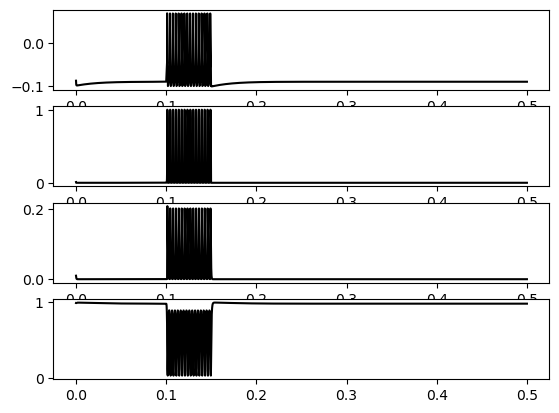

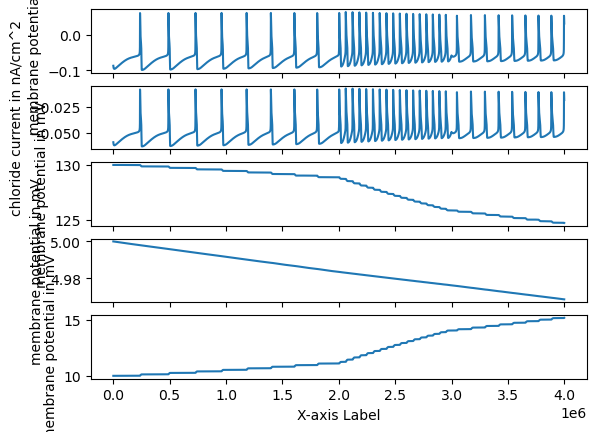

In [19]:
device.reinit()
device.activate()

#-----------------------------------------------------------------------------------------------------------------------
# Default Imports
#-----------------------------------------------------------------------------------------------------------------------
import numpy as np
import math
import scipy.constants as spc

#-----------------------------------------------------------------------------------------------------------------------
# Brian2 import: we use Brian CPP-standalone code generation for fast parallelized simulations
#-----------------------------------------------------------------------------------------------------------------------
from brian2 import *
code_dir = './codegen'
prefs.GSL.directory = '/opt/anaconda3/envs/Brian2_NGILab/include/'   ## The directory where the GSL library headings are found
set_device('cpp_standalone',directory=code_dir,build_on_run=False)
prefs.devices.cpp_standalone.openmp_threads = 2 ## The number of threads used in the parallelization (machine-dependent)
prefs.logging.file_log = False
prefs.logging.delete_log_on_exit = True

import matplotlib.pyplot as plt
from Equations_calc import calculate_gating_variable_n, calculate_gating_variable_h, calculate_gating_variable_m, return_HH_equations
from Plotting_functions import plot_variables_with_axis

#-----------------------------------------------------------------------------------------------------------------------
## Utilities
#-----------------------------------------------------------------------------------------------------------------------
def varargin(pars, **kwargs):
    """
    varargin-like option for user-defined parameters in any function/module
    Use:
    pars = varargin(pars,**kwargs)

    Input:
    - pars     : the dictionary of parameters of the calling function
    - **kwargs : a dictionary of user-defined parameters

    Output:
    - pars     : modified dictionary of parameters to be used inside the calling
                 (parent) function

    Maurizio De Pitta', The University of Chicago, August 27th, 2014.
    """
    for key, val in kwargs.items():
        if key in pars:
            pars[key] = val
    return pars

#-----------------------------------------------------------------------------------------------------------------------
## Build User-defined convenience functions to be also called by equations in neuron models by Brian  
#-----------------------------------------------------------------------------------------------------------------------
def Hill(x,K,n):
    return x**n/(x**n+K**n)
Hill = Function(Hill,arg_units=[mmolar,mmolar,1], return_unit=1,auto_vectorise=False)
Hill_cpp = '''
    #include <math.h>
    double Hill(double x,double K,double n)
    {
        return pow(x,n)/(pow(x,n)+pow(K,n));
    };
    '''
Hill.implementations.add_implementation('cpp',Hill_cpp,compiler_kwds={'headers': ['"math.h"']})

def ThermalVoltage(T):
    return spc.R*(T+273.15)/spc.physical_constants['Faraday constant'][0]
ThermalPotential = Function(ThermalVoltage,arg_units=[1], return_unit=1,auto_vectorise=False)
ThermalVoltage_cpp = '''
    #include <gsl/gsl_const_mksa.h>
    double ThermalPotential(const double T)
    {
        const double R = GSL_CONST_MKSA_MOLAR_GAS;
        const double F = GSL_CONST_MKSA_FARADAY;
        return R*(T+273.15)/F;
    }
    '''
ThermalPotential.implementations.add_implementation('cpp',ThermalVoltage_cpp,
                                                  compiler_kwds={'headers': ['"gsl_const_mksa.h"'],
                                                                 'include_dirs': ['/opt/anaconda3/envs/Brian2_NGILab/include/gsl/']})


def NernstPotential(x_e,x_i,z,T):
    """
    Nernst potential in volts (w/out units)

    Input parameters (w/out units):
    - x_e : float   Intracellular concentration
    - x_i : float   Extracellyular concentration
    - z   : int     Ion valence
    - T   : float   Temperature in ^C

    Return:
    - E_x : Nernst Reverse Potential in volt (W/OUT units)
    """
    V_T = ThermalVoltage(T)
    return V_T/z*np.log(x_e/x_i)
NernstPotential = Function(NernstPotential,arg_units=[mmolar,mmolar,1,1], return_unit=1,auto_vectorise=False)
NernstPotential_cpp = '''
    #include <gsl/gsl_const_mksa.h>
    const double R = GSL_CONST_MKSA_MOLAR_GAS; 
    const double F = GSL_CONST_MKSA_FARADAY;
    double ThermalVoltage(const double T)
    {
        return R*(T+273.15)/F;
    };
    double NernstPotential(double x_e,double x_i,double z,const double T)
    {
        return ThermalVoltage(T)*log(x_e/x_i)/z;
    };
    '''
NernstPotential.implementations.add_implementation('cpp',NernstPotential_cpp,
                                                   dependencies={'log': DEFAULT_FUNCTIONS['log']},
                                                   compiler_kwds={'headers': ['"gsl_const_mksa.h"'],
                                                                  'include_dirs': ['/opt/anaconda3/envs/Brian2_NGILab/include/gsl/']})

def Heaviside_Function(t_step, t_end, t):
    if (t < t_step):
        return 0
    elif (t_step <= t <= t_end):
        return 1
    else:
        return 0
Heaviside_Function = Function(Heaviside_Function,arg_units=[second,second,second], return_unit=1,auto_vectorise=False)
Heaviside_Function_cpp = '''
    double Heaviside_Function(double t_step, double t_end, double t)
    {
    if (t < t_step)
        return 0;
    else if (t <= t_end)
        return 1;
    else
        return 0;
    };
    '''
Heaviside_Function.implementations.add_implementation('cpp',Heaviside_Function_cpp,
                                                   dependencies={'log': DEFAULT_FUNCTIONS['log']},
                                                    )

def lpc5_parameters(model='hh-neuron',**kwargs):
    """
    Method to generate neuron parameters' dictionary.

    Input parameters:
    - model  : {'hh-neuron'} (or 'hh') | 'hh-ecs'   Model equations
    **kwargs : list of custom parameters specified by <parameter name>=<value in units>

    Return:
    - pars   : dict
    """

    ta = TimedArray([0, 0, 1, 0] * 1, dt=0.05*second)

    # Define dictionary of default parameters values
    pars = {## Concentrations to setup reverse potentials
            'C0_Na_N': 10*mmolar,
            'C0_Na_E': 145*mmolar,
            'C0_K_N': 130*mmolar,
            'C0_K_E': 3*mmolar,
            'C0_Cl_N': 5*mmolar,
            'C0_Cl_E': 130*mmolar,
            ## Neuron Parameters and conductances
            'c_m' : 1*ufarad/cm**2,
            'g_Na': 2.04e6*usiemens/cm**2,
            'g_K' : 0.638e6*usiemens/cm**2,
            'g_Cl': 0.338e2*usiemens/cm**2,
            #'g_Cl': 0*usiemens/cm**2,
            'g_KCC' : 0.2e-6*usiemens/cm**2,
            'v_thr' : 0*mvolt,
            ## Gating variables
            'U_m' : -38*mvolt,
            'U_h' : -66*mvolt,
            'U_n' : 18.7*mvolt,
            'W_m' : 6*mvolt,
            'W_h' : 6*mvolt,
            'W_n' : 9.7*mvolt,
            ## Variances of Ions
            'n_Na_N' : 0*mole,
            'n_Cl_N' : 0*mole,
            'n_K_N' : 0*mole,
            ## Temperature
            'T_exp' : 37, ## Body temperature of the animal
            ## External Stimulation
            'I_dc'  : 0*namp/cm**2,
            'I_ramp': 0*namp/cm**2,
            'I_max' : 42000*namp/cm**2,
            'T_ramp': 100*second,
            'TimedArray' : ta,
            ## times
            't_step': 0.05 * second,
            't_end' : 0.1 * second,
            ## Cell surface and volume
            'S_N' : 150*um**2,
            'V_N' : 500*um**3,
            'V_E' : 500*um**3,
            # zetas
            'zeta_Na' : 13*mmolar,
            'zeta_K' : 0.2*mmolar, 
            }

    pars = varargin(pars,**kwargs)

    # We define this quantities after any user-defined parameters are specified
    pars['T_adj'] = 2.3**(0.1*(pars['T_exp']-21))
    pars['E_Na'] = NernstPotential(pars['C0_Na_E'],pars['C0_Na_N'],1,pars['T_exp'])*volt
    pars['E_K']  = NernstPotential(pars['C0_K_E'],pars['C0_K_N'],1,pars['T_exp'])*volt
    pars['E_Cl'] = NernstPotential(pars['C0_Cl_E'],pars['C0_Cl_N'],-1,pars['T_exp'])*volt

    ## Physics constants
    pars['F'] = spc.physical_constants['Faraday constant'][0]*coulomb/mole
    pars['k'] = spc.physical_constants['Boltzmann constant'][0]*joule/kelvin
    pars['q'] = spc.physical_constants['elementary charge'][0]*coulomb
    pars['e'] = math.e

    # Thermal Voltage
    pars['V_T'] = pars['k']*pars['T_exp']*kelvin/pars['q']

    return pars

def lpc5_neuron(N,params,model='hh-ecs',name='hh*',dt=None):
    """
    Method that generate the "neuron" model with given parameters.

    Input aarguments:
    - N      : int      Number of neurons to simulate
    - params : dict     Dictionary of neuron parameters
    - model  : {'hh-neuron'} | 'hh-ecs'  Model equations
    - name   : String   The name assigned to the NeuronGroup
    - dt     : float*second minimum time step for numerical integration

    Return:
    - neuron : NeuronGroup
    """

    eqs = return_HH_equations(model)

    neuron = NeuronGroup(N,eqs,
                         threshold='v>v_thr',
                         namespace=params,
                         name=name,
                         method='rk4',
                         dt=dt)

    # Initialize gating variables
    neuron.m = 0.01
    #calculate_gating_variable_m(-87.51590043)
    neuron.h = 0.99
    #calculate_gating_variable_h(-87.51590043)
    neuron.n = 0.01
    #calculate_gating_variable_n(-87.51590043)

    # Initialize membrane potential
    neuron.v = -87.51590043*mvolt
    
    #print(NernstPotential(params['C0_Cl_E'], params['C0_Cl_N'], -1, params['T_exp'])*volt)
    

    return neuron



def lpc5_simulation(duration=1.0,model='hh-ecs', show_monitor = True, **kwargs):
    """
    This is the actual simulation of the Neuron. It is provided as a standalone method for modularity.

    Input parameters:
    - duration   : float*second   Simulated Time
    - model      : {'hh-neuron'} | 'hh-ecs'   Use only 'hh-neuron' for now. Other cases will be added later.
    :param kwargs:
    :return:
    """

    device.delete(force=True)
    ## Build the neuron model and monitors
    params = lpc5_parameters(model=model,T_ramp=duration*second,**kwargs)

    # Initialize model
    cell = lpc5_neuron(1,params,model=model,name='hh*',dt=0.05*us)

    # Set monitors
    if model=='hh-neuron':
        variables = ['v', 'm', 'n', 'h']
    elif model=='hh-ecs':
        variables = ['v','C_Cl_N','C_Na_N','C_K_N','I_K','I_Na','I_Cl','E_Cl'] #'n_Cl_N','n_K_N'
    
    sv_mon = StateMonitor(cell,variables=variables,record=True,dt=0.05*us,name='svmon')
    
    # Gene
    network = Network([cell,sv_mon])

    ## Run the simulator
    network.run(duration=duration*second,report='text')
    device.build(directory=code_dir, clean=True)

    if show_monitor:
        for variable in variables:
            print(getattr(sv_mon, variable))

    v_list = []
    time_list = []
    
    # v_list = list(sv_mon.v[0])
    # time_list = list(sv_mon.t)

    ## Visualizing data
    if model=='hh-neuron':
        fig, ax = plt.subplots(4, 1)
        ax[0].plot(sv_mon.t, sv_mon.v[:].T, 'k-')
        ax[1].plot(sv_mon.t, sv_mon.m[:].T, 'k-')
        ax[2].plot(sv_mon.t, sv_mon.n[:].T, 'k-')
        ax[3].plot(sv_mon.t, sv_mon.h[:].T, 'k-')
    elif model=='hh-ecs':
        # Introduce variables and their axis titles 
        plotting_list = [
            {
                'variable': 'v', 
                'axis': 'membrane potential in mV'
            },
            {
                'variable': 'I_Cl', 
                'axis': 'chloride current in nA/cm^2'
            },
            {
                'variable': 'C_K_N', 
                'axis': 'membrane potential in mV'
            },
            {
                'variable': 'C_Cl_N',
                'axis': 'membrane potential in mV'
            },
            {
                'variable': 'C_Na_N',
                'axis': 'membrane potential in mV'
            }]

        count = len(plotting_list)
        fig, ax = plt.subplots(count, 1,sharex=True)
        ax[-1].set_xlabel("X-axis Label")
        a = 0
        for element in plotting_list:
            print(element['variable'])
            ax[a].plot(getattr(sv_mon, element['variable'])[:].T)
            ax[a].set_ylabel(element['axis'])
            a+=1
        
    device.delete(force=True)
    return v_list, time_list


if __name__=="__main__":
    """
    Uncomment individual sections to test different methods 
    """

    # #-------------------------------------------------------------------------------------------------------------------
    # # Generate Neuron Simulation
    # #-------------------------------------------------------------------------------------------------------------------
    print(lpc5_parameters('hh-ecs',I_dc=10**4.5*nA/cm**2))

    # Single Neuron HH
    hh_neuron_mon, time_list = lpc5_simulation(duration=0.5,model='hh-neuron', I_dc=10**4.2*nA/cm**2)

    # Reinitialization
    device.reinit()
    device.activate()
    set_device('cpp_standalone',directory=code_dir,build_on_run=False)
    prefs.devices.cpp_standalone.openmp_threads = 2 ## The number of threads used in the parallelization (machine-dependent)

     # Single Neuron HH-ecs

    ecs_neuron_mon, time_list = lpc5_simulation(duration=0.2,model='hh-ecs', I_dc=10**4.2*nA/cm**2)

    # fig, ax = plt.subplots(1, 1)
    # ax.plot(time_list, hh_neuron_mon[:], 'k-')
    # ax.plot(time_list, ecs_neuron_mon[:], 'r')

    # #-------------------------------------------------------------------------------------------------------------------
    ## Show figures
    # #-------------------------------------------------------------------------------------------------------------------
    plt.show()

## Implementation of a Synapse in (2) - (4)

In [2]:
#-----------------------------------------------------------------------------------------------------------------------
# Default Imports
#-----------------------------------------------------------------------------------------------------------------------
device.reinit()
device.activate()

import numpy as np
import gsl 
import scipy.constants as spc

#-----------------------------------------------------------------------------------------------------------------------
# Brian2 import: we use Brian CPP-standalone code generation for fast parallelized simulations
#-----------------------------------------------------------------------------------------------------------------------
from brian2 import *
code_dir = './codegen'
prefs.GSL.directory = '/opt/anaconda3/envs/Brian2_NGILab/include/'   ## The directory where the GSL library headings are found
set_device('cpp_standalone',directory=code_dir,build_on_run=False)
prefs.devices.cpp_standalone.openmp_threads = 2 ## The number of threads used in the parallelization (machine-dependent)
prefs.logging.file_log = False
prefs.logging.delete_log_on_exit = True

import matplotlib.pyplot as plt

#-----------------------------------------------------------------------------------------------------------------------
## Utilities
#-----------------------------------------------------------------------------------------------------------------------
def varargin(pars, **kwargs):
    """
    varargin-like option for user-defined parameters in any function/module
    Use:
    pars = varargin(pars,**kwargs)

    Input:
    - pars     : the dictionary of parameters of the calling function
    - **kwargs : a dictionary of user-defined parameters

    Output:
    - pars     : modified dictionary of parameters to be used inside the calling
                 (parent) function

    Maurizio De Pitta', The University of Chicago, August 27th, 2014.
    """
    for key, val in kwargs.items():
        if key in pars:
            pars[key] = val
    return pars

#-----------------------------------------------------------------------------------------------------------------------
## Build User-defined convenience functions to be also called by equations in neuron models by Brian  
#-----------------------------------------------------------------------------------------------------------------------
def Hill(x,K,n):
    return x**n/(x**n+K**n)
Hill = Function(Hill,arg_units=[mmolar,mmolar,1], return_unit=1,auto_vectorise=False)
Hill_cpp = '''
    #include <math.h>
    double Hill(double x,double K,double n)
    {
        return pow(x,n)/(pow(x,n)+pow(K,n));
    };
    '''
Hill.implementations.add_implementation('cpp',Hill_cpp,compiler_kwds={'headers': ['"math.h"']})

def ThermalVoltage(T):
    return spc.R*(T+273.15)/spc.physical_constants['Faraday constant'][0]
ThermalPotential = Function(ThermalVoltage,arg_units=[1], return_unit=1,auto_vectorise=False)
ThermalVoltage_cpp = '''
    #include <gsl/gsl_const_mksa.h>
    double ThermalPotential(const double T)
    {
        const double R = GSL_CONST_MKSA_MOLAR_GAS;
        const double F = GSL_CONST_MKSA_FARADAY;
        return R*(T+273.15)/F;
    }
    '''
ThermalPotential.implementations.add_implementation('cpp',ThermalVoltage_cpp,
                                                  compiler_kwds={'headers': ['"gsl_const_mksa.h"'],
                                                                 'include_dirs': ['/opt/anaconda3/envs/Brian2_NGILab/include/gsl/']})
def NernstPotential(x_e,x_i,z,T):
    """
    Nernst potential in volts (w/out units)

    Input parameters (w/out units):
    - x_e : float   Intracellular concentration
    - x_i : float   Extracellyular concentration
    - z   : int     Ion valence
    - T   : float   Temperature in ^C

    Return:
    - E_x : Nernst Reverse Potential in volt (W/OUT units)
    """
    V_T = ThermalVoltage(T)
    return V_T/z*np.log(x_e/x_i)
NernstPotential = Function(NernstPotential,arg_units=[mmolar,mmolar,1,1], return_unit=1,auto_vectorise=False)
NernstPotential_cpp = '''
    #include <gsl/gsl_const_mksa.h>
    const double R = GSL_CONST_MKSA_MOLAR_GAS; 
    const double F = GSL_CONST_MKSA_FARADAY;
    double ThermalVoltage(const double T)
    {
        return R*(T+273.15)/F;
    };
    double NernstPotential(double x_e,double x_i,double z,const double T)
    {
        return ThermalVoltage(T)*log(x_e/x_i)/z;
    };
    '''
NernstPotential.implementations.add_implementation('cpp',NernstPotential_cpp,
                                                   dependencies={'log': DEFAULT_FUNCTIONS['log']},
                                                   compiler_kwds={'headers': ['"gsl_const_mksa.h"'],
                                                                  'include_dirs': ['/usr/include/gsl']})

def lpc5_parameters(model='hh-neuron',**kwargs):
    """
    Method to generate neuron parameters' dictionary.

    Input parameters:
    - model  : {'hh-neuron'} (or 'hh') | 'hh-ecs'   Model equations
    **kwargs : list of custom parameters specified by <parameter name>=<value in units>

    Return:
    - pars   : dict
    """

    # Define dictionary of default parameters values
    pars = {## Concentrations to setup reverse potentials
            'N0_i': 10*mmolar,
            'N0_e': 145*mmolar,
            'K0_i': 130*mmolar,
            'K0_e': 3*mmolar,
            'C0_i': 5*mmolar,
            'C0_e': 130*mmolar,
            ## Neuron Parameters and conductances
            'c_m' : 1*ufarad/cm**2,
            'g_Na': 2.04e6*usiemens/cm**2,
            'g_K' : 0.638e6*usiemens/cm**2,
            'g_Cl': 0.338e3*usiemens/cm**2,
            'v_thr' : 0*mvolt,
            ## Gating variables
            'U_m' : -38*mvolt,
            'U_h' : -66*mvolt,
            'U_n' : 18.7*mvolt,
            'W_m' : 6*mvolt,
            'W_h' : 6*mvolt,
            'W_n' : 9.7*mvolt,
            ## Temperature
            'T_exp' : 37, ## Body temperature of the animal
            ## External Stimulation
            'I_dc'  : 0*namp/cm**2,
            'I_ramp': 0*namp/cm**2,
            'T_ramp': 100*second,
            }

    pars = varargin(pars,**kwargs)

    # We define this quantities after any user-defined parameters are specified
    pars['T_adj'] = 2.3**(0.1*(pars['T_exp']-21))
    pars['E_Na'] = NernstPotential(pars['N0_e'],pars['N0_i'],1,pars['T_exp'])*volt
    pars['E_K']  = NernstPotential(pars['K0_e'],pars['K0_i'],1,pars['T_exp'])*volt
    pars['E_Cl'] = NernstPotential(pars['C0_e'],pars['C0_i'],-1,pars['T_exp'])*volt

    ## Physics constants
    pars['F'] = spc.physical_constants['Faraday constant'][0]*coulomb/mole

    return pars

def lpc5_neuron(N,params,model='hh-neuron',name='hh*',dt=None):
    """
    Method that generate the "neuron" model with given parameters.

    Input aarguments:
    - N      : int      Number of neurons to simulate
    - params : dict     Dictionary of neuron parameters
    - model  : {'hh-neuron'} | 'hh-ecs'  Model equations
    - name   : String   The name assigned to the NeuronGroup
    - dt     : float*second minimum time step for numerical integration

    Return:
    - neuron : NeuronGroup
    """

    eqs = Equations('''
    a_m=-0.182/second/mvolt*(v-U_m)/expm1((U_m-v)/W_m)   : hertz
    b_m=-0.124/second/mvolt*(U_m-v)/expm1((v-U_m)/W_m)   : hertz
    a_h=-0.015/second/mvolt*(U_h-v)/expm1((v-U_h)/W_h)   : hertz
    b_h=-0.015/second/mvolt*(v-U_h)/expm1((U_h-v)/W_h)   : hertz
    m_inf=a_m/(a_m+b_m)                                : 1
    h_inf=a_h/(a_h+b_h)                                : 1
    n_inf=1/(1+exp(-(v-U_n)/W_n))                      : 1
    tau_m=1e-3/(a_m+b_m)/T_adj                         : second
    tau_h=1e-3/(a_h+b_h)/T_adj                         : second
    tau_n=4*ms/(1+exp(-(v+56.56*mvolt)/(44.14*mvolt)))/T_adj      : second
    I_inj=I_dc+I_ramp*t/T_ramp                      : amp/meter**2
    dm/dt=(m_inf-m)/tau_m                           : 1
    dh/dt=(h_inf-h)/tau_h                           : 1
    dn/dt=(n_inf-n)/tau_n                           : 1
    ''')

    if model=='hh-neuron':
        eqs += Equations('''
            I_Na=g_Na*m**3*h*(v-E_Na)                       : amp/meter**2
            I_K=g_K*n*(v-E_K)                               : amp/meter**2
            I_Cl=g_Cl*(v-E_Cl)                              : amp/meter**2
            dv/dt=(I_inj-I_Na-I_K-I_Cl)/c_m                 : volt   
        ''')
    else:
        ## w/ ECS
        pass

    neuron = NeuronGroup(N,eqs,
                         threshold='v>v_thr',
                         namespace=params,
                         name=name,
                         method='rk4',
                         dt=dt)

    # Initialize gating variables
    neuron.m = calculate_gating_variable_m(-70)
    neuron.h = calculate_gating_variable_h(-70)
    neuron.n = calculate_gating_variable_n(-70)

    return neuron

def lpc5_simulation(duration=1,model='hh-neuron',**kwargs):
    """
    This is the actual simulation of the Neuron. It is provided as a standalone method for modularity.

    Input parameters:
    - duration   : float*second   Simulated Time
    - model      : {'hh-neuron'} | 'hh-ecs'   Use only 'hh-neuron' for now. Other cases will be added later.
    :param kwargs:
    :return:
    """

    device.delete(force=True)
    ## Build the neuron model and monitors
    params = lpc5_parameters(model=model,T_ramp=duration*second,**kwargs)

    # Initialize model
    cell = lpc5_neuron(1,params,model=model,name='HH',dt=0.1*us)
    cell.v = -70*mvolt
    # NernstPotential(params['C0_e'],params['C0_i'],-1,params['T_exp'])*volt

    # Set monitors
    if model=='hh-neuron':
        variables = ['v']
    elif model=='hh-ecs':
        variables = ['v','C_i','N_i','K_i','I_K','I_Na','I_Cl','n_Cl','n_K','E_Cl']
    sv_mon = StateMonitor(cell,variables=variables,record=True,dt=0.1*ms,name='svmon')
    # Gene
    network = Network([cell,sv_mon])
    ## Run the simulator
    network.run(duration=duration*second,report='text')
    device.build(directory=code_dir, clean=True)

    ## Visualizing data
    if model=='hh-neuron':
        fig, ax = plt.subplots(1, 1)
        ax.plot(sv_mon.t, sv_mon.v[:].T, 'k-')
    elif model=='hh-ecs':
        fig, ax = plt.subplots(6, 1,sharex=True)
        ax[0].plot(sv_mon.t, sv_mon.v[:].T, 'k-')
        ax[0].plot(sv_mon.t, sv_mon.E_Cl[:].T, 'm-')
        # ax[1].plot(sv_mon.t, sv_mon.C_i[:].T, 'm-')
        # ax[1].plot(sv_mon.t, sv_mon.C_i[:].T, 'r-')
        # ax[1].plot(sv_mon.t, sv_mon.N_i[:].T, 'r-')
        # ax[1].plot(sv_mon.t,sv_mon.I_Na[:].T,'r-')
        # ax[2].plot(sv_mon.t,sv_mon.I_K[:].T,'b-')
        # ax[3].plot(sv_mon.t,sv_mon.I_Cl[:].T,'g-')
        # ax[4].plot(sv_mon.t,sv_mon.I_NKP[:].T,'y-')
        # ax[5].plot(sv_mon.t,sv_mon.I_KCC[:].T,'m-')
        ax[1].plot(sv_mon.t, sv_mon.n_Cl[:].T, 'm-')
        ax[1].hlines(0,*sv_mon.t[[0,-1]])
        ax[2].plot(sv_mon.t, sv_mon.I_Cl[:].T, 'r-')
        ax[3].plot(sv_mon.t, sv_mon.n_K[:].T, 'g-')

    device.delete(force=True)

if __name__=="__main__":
    """
    Uncomment individual sections to test different methods 
    """

    # #-------------------------------------------------------------------------------------------------------------------
    # # Verify Reverse Potentials
    # #-------------------------------------------------------------------------------------------------------------------
    # T= 37
    # print('E_Na\t',NernstPotential(126,9,1,T))
    # print('E_K\t',NernstPotential(2.5,130,1,T))
    # print('E_Cl\t',NernstPotential(130,10,-1,T))

    # #-------------------------------------------------------------------------------------------------------------------
    # # Generate Neuron Simulation
    # #-------------------------------------------------------------------------------------------------------------------
    print(lpc5_parameters('hh-neuron',I_dc=10**4.5*nA/cm**2))
    # Single Neuron

    model = 'hh-neuron'
    duration=1

    params = lpc5_parameters(model=model,T_ramp=duration*second,I_dc=10**4.5*nA/cm**2)
    neurons = lpc5_neuron(2,params,model=model,name='HH',dt=0.1*us)

    S = Synapses(neurons, neurons, '''
             w : siemens (constant) # gap junction conductance
             ''')
    S.connect(i=[0, 1], j=[1, 0])  # or simply S.connect() since it connects all-to-all
    S.w = 50*nS  # Uses the same conductance everywhere
    sv_mon = StateMonitor(neurons,variables=['v'],record=True,dt=0.1*ms,name='svmon')
    network = Network([neurons, S, sv_mon])
    network.run(duration=duration*second,report='text')

    device.build(directory=code_dir, clean=True)

    ## Visualizing data
    if model=='hh-neuron':
        fig, ax = plt.subplots(1, 1)
        ax.plot(sv_mon.t, sv_mon.v[0].T, 'k-')
        ax.plot(sv_mon.t, sv_mon.v[1].T, 'r')

    device.delete(force=True)








    # lpc5_simulation(duration=1,model='hh-neuron',I_dc=10**4.2*nA/cm**2)










    # #-------------------------------------------------------------------------------------------------------------------
    ## Show figures
    # #-------------------------------------------------------------------------------------------------------------------
    plt.show()

ModuleNotFoundError: No module named 'gsl'